# NEW YORK MOBILITY DATASET

# Data Preparation

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
import os
import matplotlib.pyplot as plt
# %matplotlib notebook
# !pip install wordcloud
# !pip install -U yellowbrick
# !pip install lightgbm
from wordcloud import WordCloud
import math
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chisquare
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import array
from pylab import rcParams
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

/Users/enayat/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Data

In [2]:
Trips_NYC = pd.read_csv('Citywide_Mobility_Survey_-_Trip_Diary_2018_data for clustering.csv', encoding='utf-8')
Trips_NYC

,Trip ID,SURVEYZONE_START,SURVEYZONE_END,qGENDER,qINCOME,qRACECODE,qCARACCESS,qPurposeRecode,Day Grouping,Within Zone?,Income Group,Purpose Grouping,qSustainableMode
0,0,Manhattan Core,Manhattan Core,Male,"100,000− 149,999",White,own car,Commute to/from work,Weekend,within,middle income,Work/School,Yes
1,1,Manhattan Core,Manhattan Core,Female,"35,000− 49,999",White,NO car,Commute to/from work,Weekday,within,low income,Work/School,Yes
2,2,Inner Brooklyn,Inner Brooklyn,Female,"100,000− 149,999",Black,own car,Other,Weekday,within,middle income,Others,Yes
3,3,Northern Bronx,Inner Brooklyn,Female,"50,000 - 74,999",Hispanic,NO car,Commute to/from work,Weekday,outside,low income,Work/School,Yes
4,4,Manhattan Core,Outer Brooklyn,Female,"Less than 14,999",Other,NO car,School,Weekday,outside,low income,Work/School,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,7124,Outer Queens,Outer Queens,Female,"35,000− 49,999",Black,NO car,Commute to/from work,Weekday,within,low income,Work/School,No
7125,7125,Outside of NYC,Southern Bronx,Male,"150,000− 199,999",Hispanic,own car,Commute to/from work,Weekday,outside,high income,Work/School,No
7126,7126,Outer Queens,Outer Queens,Female,"35,000− 49,999",Black,NO car,Social/recreation,Weekday,within,low income,Social,No
7127,7127,Outer Queens,Outer Queens,Female,"35,000− 49,999",Black,NO car,Social/recreation,Weekday,within,low income,Social,No


### List of Columns/Attributes and No. of Rows and Columns

In [3]:
list(Trips_NYC)

['Trip ID',
 'SURVEYZONE_START',
 'SURVEYZONE_END',
 'qGENDER',
 'qINCOME',
 'qRACECODE',
 'qCARACCESS',
 'qPurposeRecode',
 'Day Grouping',
 'Within Zone?',
 'Income Group',
 'Purpose Grouping',
 'qSustainableMode']

In [4]:
print("Number of rows     :{}".format(Trips_NYC.shape[0]))
print("Number of columns  :{}".format(Trips_NYC.shape[1]))

Number of rows     :7129
Number of columns  :13


In [11]:
TRIPS = Trips_NYC.columns[(Trips_NYC.dtypes =='object').values].tolist()
TRIPS

['SURVEYZONE_START',
 'SURVEYZONE_END',
 'qGENDER',
 'qINCOME',
 'qRACECODE',
 'qCARACCESS',
 'qPurposeRecode',
 'Day Grouping',
 'Within Zone?',
 'Income Group',
 'Purpose Grouping',
 'qSustainableMode']

In [14]:
# fig, axes = plt.subplots( nrows= len(TRIPS),  figsize=(10,30))
# for TRIPS, ax in zip(Trips_NYC[TRIPS], axes):
#     Trips_NYC[TRIPS].value_counts().sort_values().plot.barh(ax=ax, title=TRIPS + ' histogram')

# plt.tight_layout()    
# plt.show()

# Data Analysis: Trip Details

## Additional Pre-processing Steps

In [17]:
list(Trips_NYC)

['Trip ID',
 'SURVEYZONE_START',
 'SURVEYZONE_END',
 'qGENDER',
 'qINCOME',
 'qRACECODE',
 'qCARACCESS',
 'qPurposeRecode',
 'Day Grouping',
 'Within Zone?',
 'Income Group',
 'Purpose Grouping',
 'qSustainableMode']

In [18]:
Trips_NYC_Analysis_byTrips = Trips_NYC.drop(labels= ['Trip ID', 'SURVEYZONE_END','qPurposeRecode','qINCOME'], axis=1)

In [19]:
list(Trips_NYC_Analysis_byTrips)

['SURVEYZONE_START',
 'qGENDER',
 'qRACECODE',
 'qCARACCESS',
 'Day Grouping',
 'Within Zone?',
 'Income Group',
 'Purpose Grouping',
 'qSustainableMode']

In [20]:
A_TRIPS = Trips_NYC_Analysis_byTrips.columns[(Trips_NYC_Analysis_byTrips.dtypes =='object').values].tolist()
A_TRIPS

['SURVEYZONE_START',
 'qGENDER',
 'qRACECODE',
 'qCARACCESS',
 'Day Grouping',
 'Within Zone?',
 'Income Group',
 'Purpose Grouping',
 'qSustainableMode']

In [21]:
# For these categorical columns, LabelEnconder was used to convert them to numerical datatype
from sklearn.preprocessing import LabelEncoder

for col in A_TRIPS:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        Trips_NYC_Analysis_byTrips[col] = globals()['LE_{}'.format(col)].fit_transform(Trips_NYC_Analysis_byTrips[col])
Trips_NYC_Analysis_byTrips.head() 

,SURVEYZONE_START,qGENDER,qRACECODE,qCARACCESS,Day Grouping,Within Zone?,Income Group,Purpose Grouping,qSustainableMode
0,2,1,4,1,1,1,2,2,1
1,2,0,4,0,0,1,1,2,1
2,0,0,1,1,0,1,2,0,1
3,4,0,2,0,0,0,1,2,1
4,2,0,3,0,0,0,1,2,1


In [22]:
# Listing the category labels of the converted numerical values
for col in A_TRIPS:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

SURVEYZONE_START   :  ['Inner Brooklyn' 'Inner Queens' 'Manhattan Core' 'Middle Queens'
 'Northern Bronx' 'Northern Manhattan' 'Outer Brooklyn' 'Outer Queens'
 'Outside of NYC' 'Southern Bronx' 'Staten Island']
qGENDER   :  ['Female' 'Male']
qRACECODE   :  ['Asian' 'Black' 'Hispanic' 'Other' 'White']
qCARACCESS   :  ['NO car' 'own car']
Day Grouping   :  ['Weekday' 'Weekend']
Within Zone?   :  ['outside' 'within']
Income Group   :  ['high income' 'low income' 'middle income']
Purpose Grouping   :  ['Others' 'Social' 'Work/School']
qSustainableMode   :  ['No' 'Yes']


### Correlations visualized through Heatmap

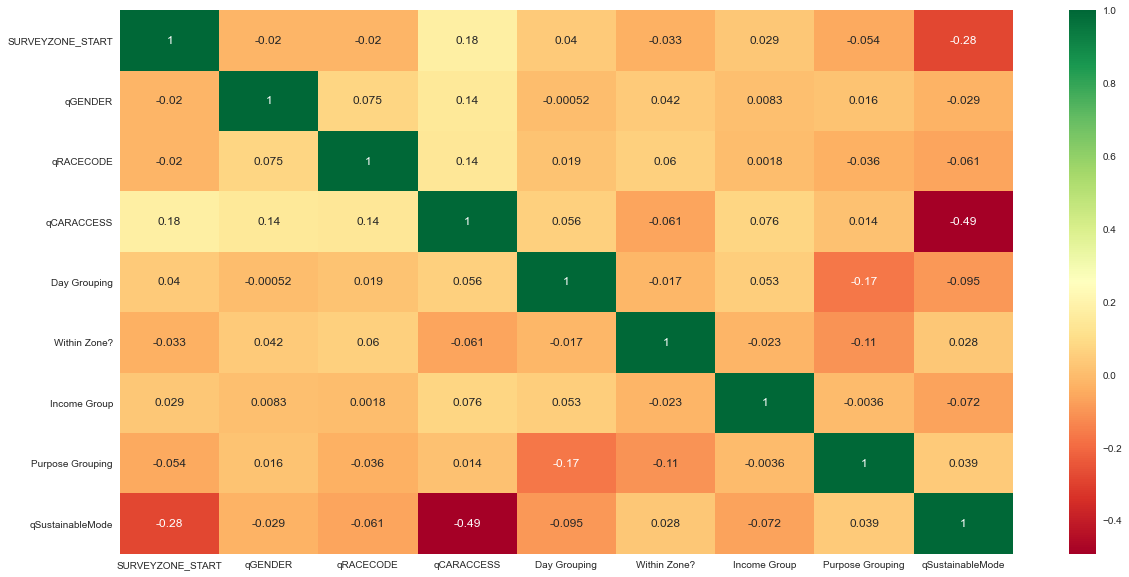

In [23]:
corrmat = Trips_NYC_Analysis_byTrips.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

g=sns.heatmap(Trips_NYC_Analysis_byTrips[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Visualizing and Understanding the Correlation between Independent Variables and Target Variables

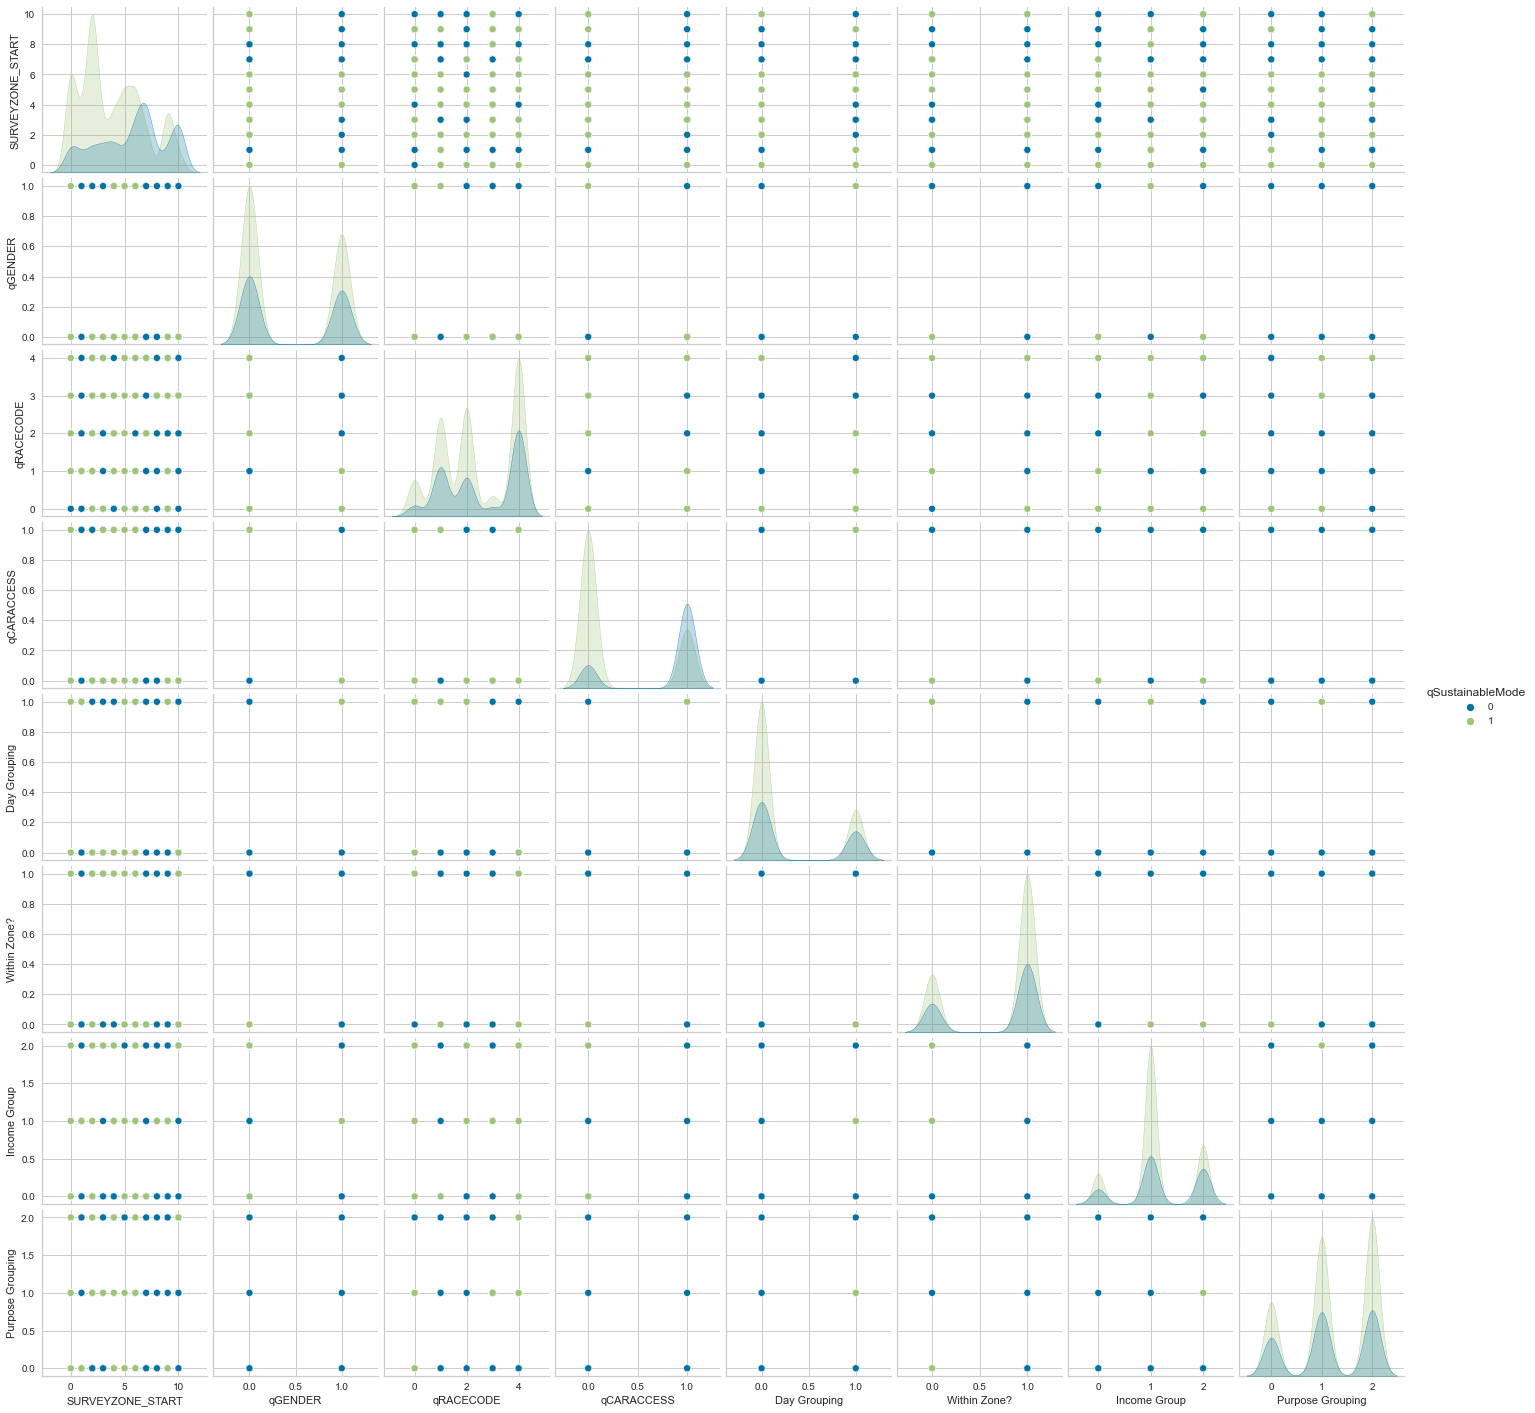

In [24]:
sns.pairplot(Trips_NYC_Analysis_byTrips, hue ='qSustainableMode')

# Clustering

In [25]:
Trips_NYC_Analysis_byTrips

,SURVEYZONE_START,qGENDER,qRACECODE,qCARACCESS,Day Grouping,Within Zone?,Income Group,Purpose Grouping,qSustainableMode
0,2,1,4,1,1,1,2,2,1
1,2,0,4,0,0,1,1,2,1
2,0,0,1,1,0,1,2,0,1
3,4,0,2,0,0,0,1,2,1
4,2,0,3,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
7124,7,0,1,0,0,1,1,2,0
7125,8,1,2,1,0,0,0,2,0
7126,7,0,1,0,0,1,1,1,0
7127,7,0,1,0,0,1,1,1,0


In [26]:
# We used the Elbow Method to find the k value within the range of 1-10
results = {'n':[], 'd_sum':[]}

for n in range(1,10):
    cluster_model = KMeans(init='k-means++', n_clusters=n, n_init=12)
    cluster_model.fit(Trips_NYC_Analysis_byTrips)
    results['n'].append(n)
    results['d_sum'].append(cluster_model.inertia_)
 
print(results)

{'n': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'd_sum': [98163.63192593632, 46027.05266615801, 35878.85978821019, 29979.548783705584, 25412.112414669755, 23148.820167797545, 21409.608406300795, 19948.571000569802, 18762.25301419245]}


Elbow Method to determine the number of clusters to be formed:


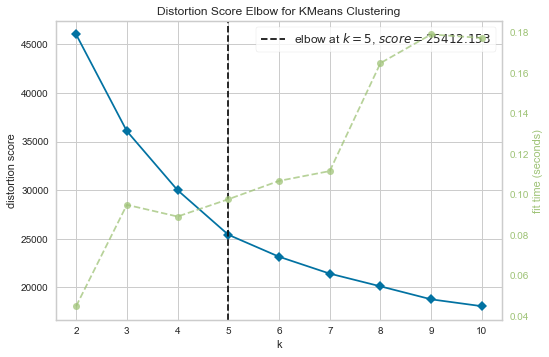

In [27]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
fig, dist = plt.subplots()
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(Trips_NYC_Analysis_byTrips)
Elbow_M.show()
plt.show()

### Dividing Data into Clusters

In [28]:
cluster_model = KMeans(init='k-means++', n_clusters=5, n_init=12)
cluster_model.fit(Trips_NYC_Analysis_byTrips)
CLUSTERS = cluster_model.labels_

In [29]:
Trips_NYC_Analysis_byTrips['CLUSTERS'] = CLUSTERS

In [30]:
Trips_NYC_Analysis_byTrips['CLUSTERS'].value_counts()

0    1813
2    1622
1    1433
3    1157
4    1104
Name: CLUSTERS, dtype: int64

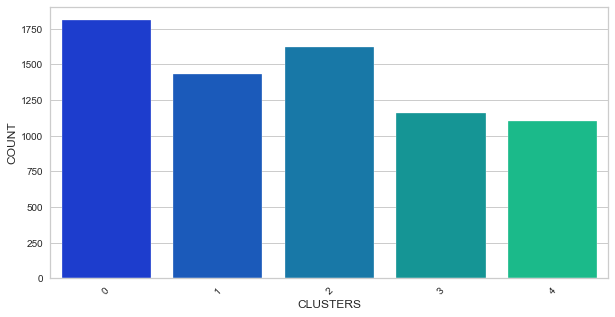

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x = Trips_NYC_Analysis_byTrips['CLUSTERS'],  palette = "winter")
plt.xlabel('CLUSTERS', fontsize = 12)
plt.ylabel("COUNT", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [32]:
Trips_NYC_Analysis_byTrips

,SURVEYZONE_START,qGENDER,qRACECODE,qCARACCESS,Day Grouping,Within Zone?,Income Group,Purpose Grouping,qSustainableMode,CLUSTERS
0,2,1,4,1,1,1,2,2,1,2
1,2,0,4,0,0,1,1,2,1,2
2,0,0,1,1,0,1,2,0,1,1
3,4,0,2,0,0,0,1,2,1,0
4,2,0,3,0,0,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
7124,7,0,1,0,0,1,1,2,0,0
7125,8,1,2,1,0,0,0,2,0,3
7126,7,0,1,0,0,1,1,1,0,0
7127,7,0,1,0,0,1,1,1,0,0


### Interpretation of each Cluster

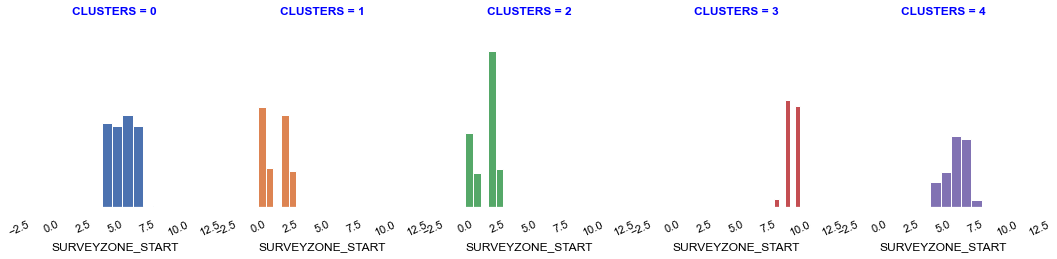

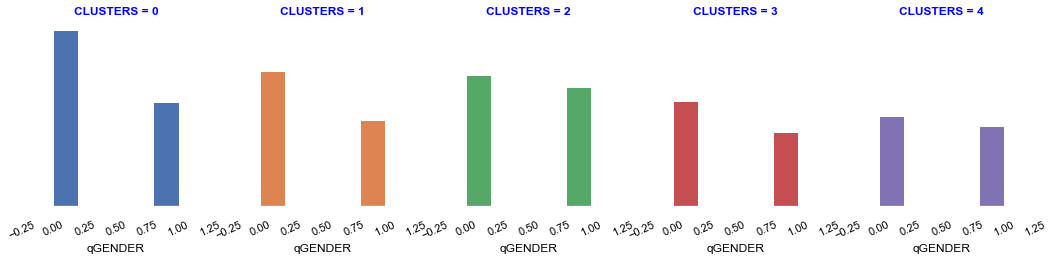

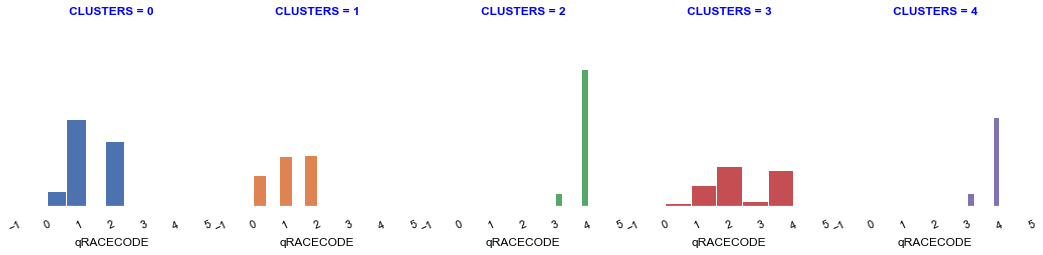

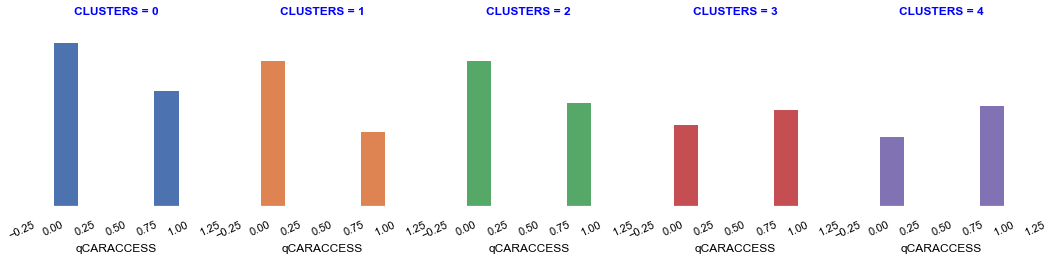

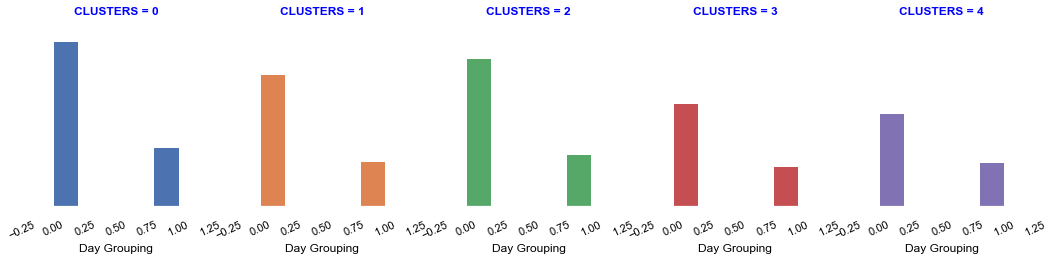

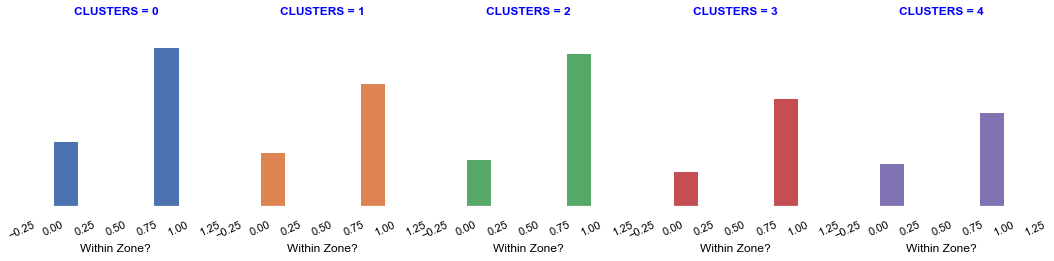

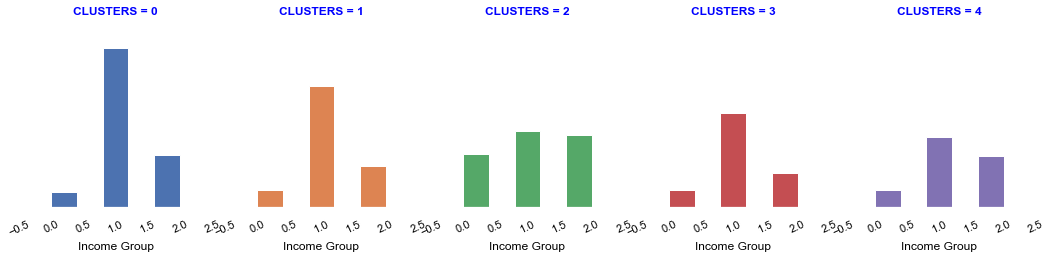

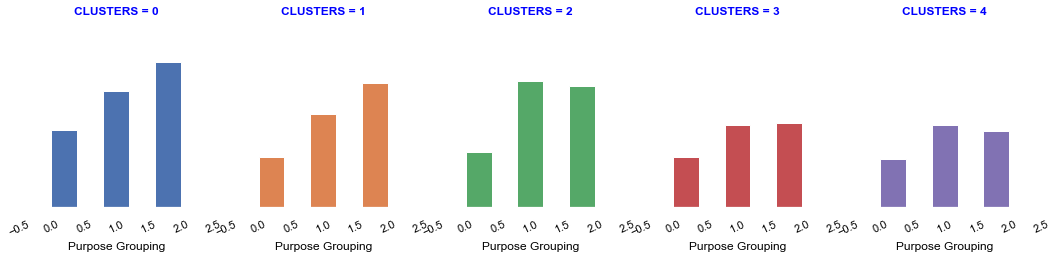

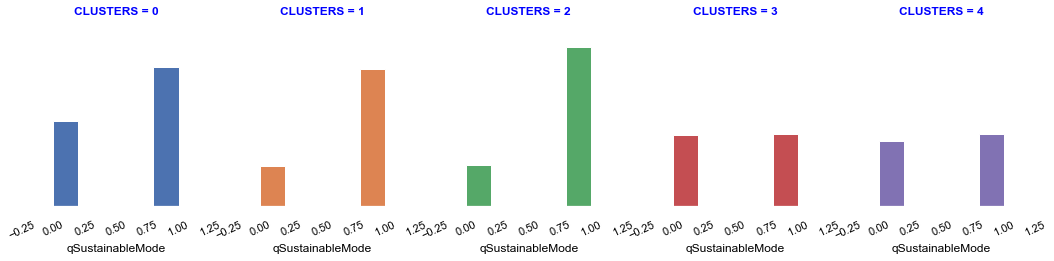

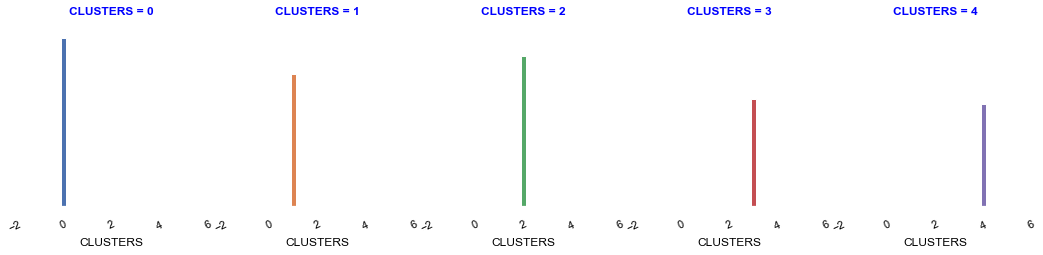

In [33]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})

for i in Trips_NYC_Analysis_byTrips:
    diag = sns.FacetGrid(Trips_NYC_Analysis_byTrips, col = "CLUSTERS", hue = "CLUSTERS")
    diag.map(plt.hist, i, bins=5) 
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=12, color = 'black')
    diag.set_titles(size=12, color = 'blue', fontweight="bold")
    diag.fig.set_figheight(4)

### Understand Correlation

In [34]:
Trips_NYC_Analysis_byTrips.corr()

,SURVEYZONE_START,qGENDER,qRACECODE,qCARACCESS,Day Grouping,Within Zone?,Income Group,Purpose Grouping,qSustainableMode,CLUSTERS
SURVEYZONE_START,1.000000,-0.019806,-0.020055,0.178465,0.040216,-0.033322,0.029248,-0.054128,-0.282608,0.321350
qGENDER,-0.019806,1.000000,0.075187,0.144870,-0.000522,0.041548,0.008256,0.015834,-0.028719,0.065916
qRACECODE,-0.020055,0.075187,1.000000,0.140880,0.019438,0.060301,0.001818,-0.035697,-0.061113,0.658644
qCARACCESS,0.178465,0.144870,0.140880,1.000000,0.056154,-0.060658,0.075737,0.014248,-0.491525,0.141132
Day Grouping,0.040216,-0.000522,0.019438,0.056154,1.000000,-0.017314,0.053160,-0.169227,-0.095147,0.040070
Within Zone?,-0.033322,0.041548,0.060301,-0.060658,-0.017314,1.000000,-0.022585,-0.105346,0.027843,0.009770
Income Group,0.029248,0.008256,0.001818,0.075737,0.053160,-0.022585,1.000000,-0.003554,-0.071818,0.025152
Purpose Grouping,-0.054128,0.015834,-0.035697,0.014248,-0.169227,-0.105346,-0.003554,1.000000,0.038725,-0.039488
qSustainableMode,-0.282608,-0.028719,-0.061113,-0.491525,-0.095147,0.027843,-0.071818,0.038725,1.000000,-0.108468
CLUSTERS,0.321350,0.065916,0.658644,0.141132,0.040070,0.009770,0.025152,-0.039488,-0.108468,1.000000


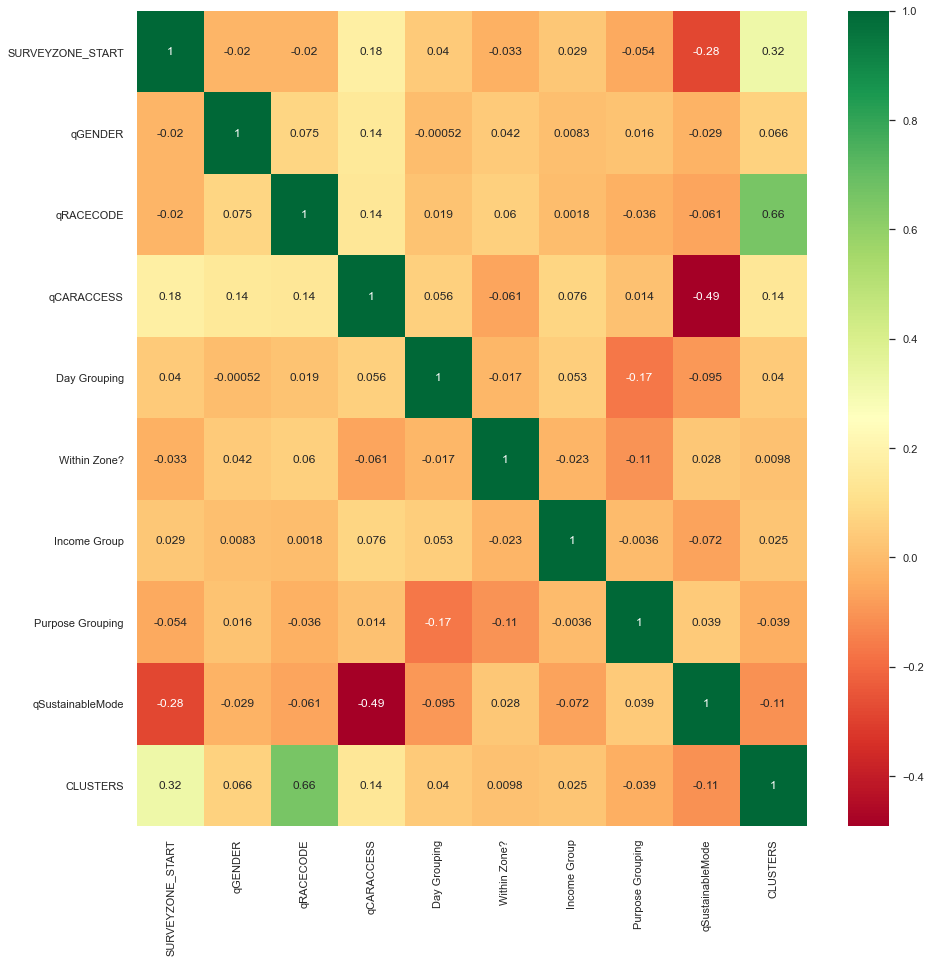

In [35]:
corrmat = Trips_NYC_Analysis_byTrips.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

g=sns.heatmap(Trips_NYC_Analysis_byTrips[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
cor_target = abs(corrmat["CLUSTERS"])
relevant_features = cor_target[cor_target>.2]
relevant_features

SURVEYZONE_START    0.321350
qRACECODE           0.658644
CLUSTERS            1.000000
Name: CLUSTERS, dtype: float64

### Pairplot for the Highly Correlated Columns to 'CLUSTERS' target variable

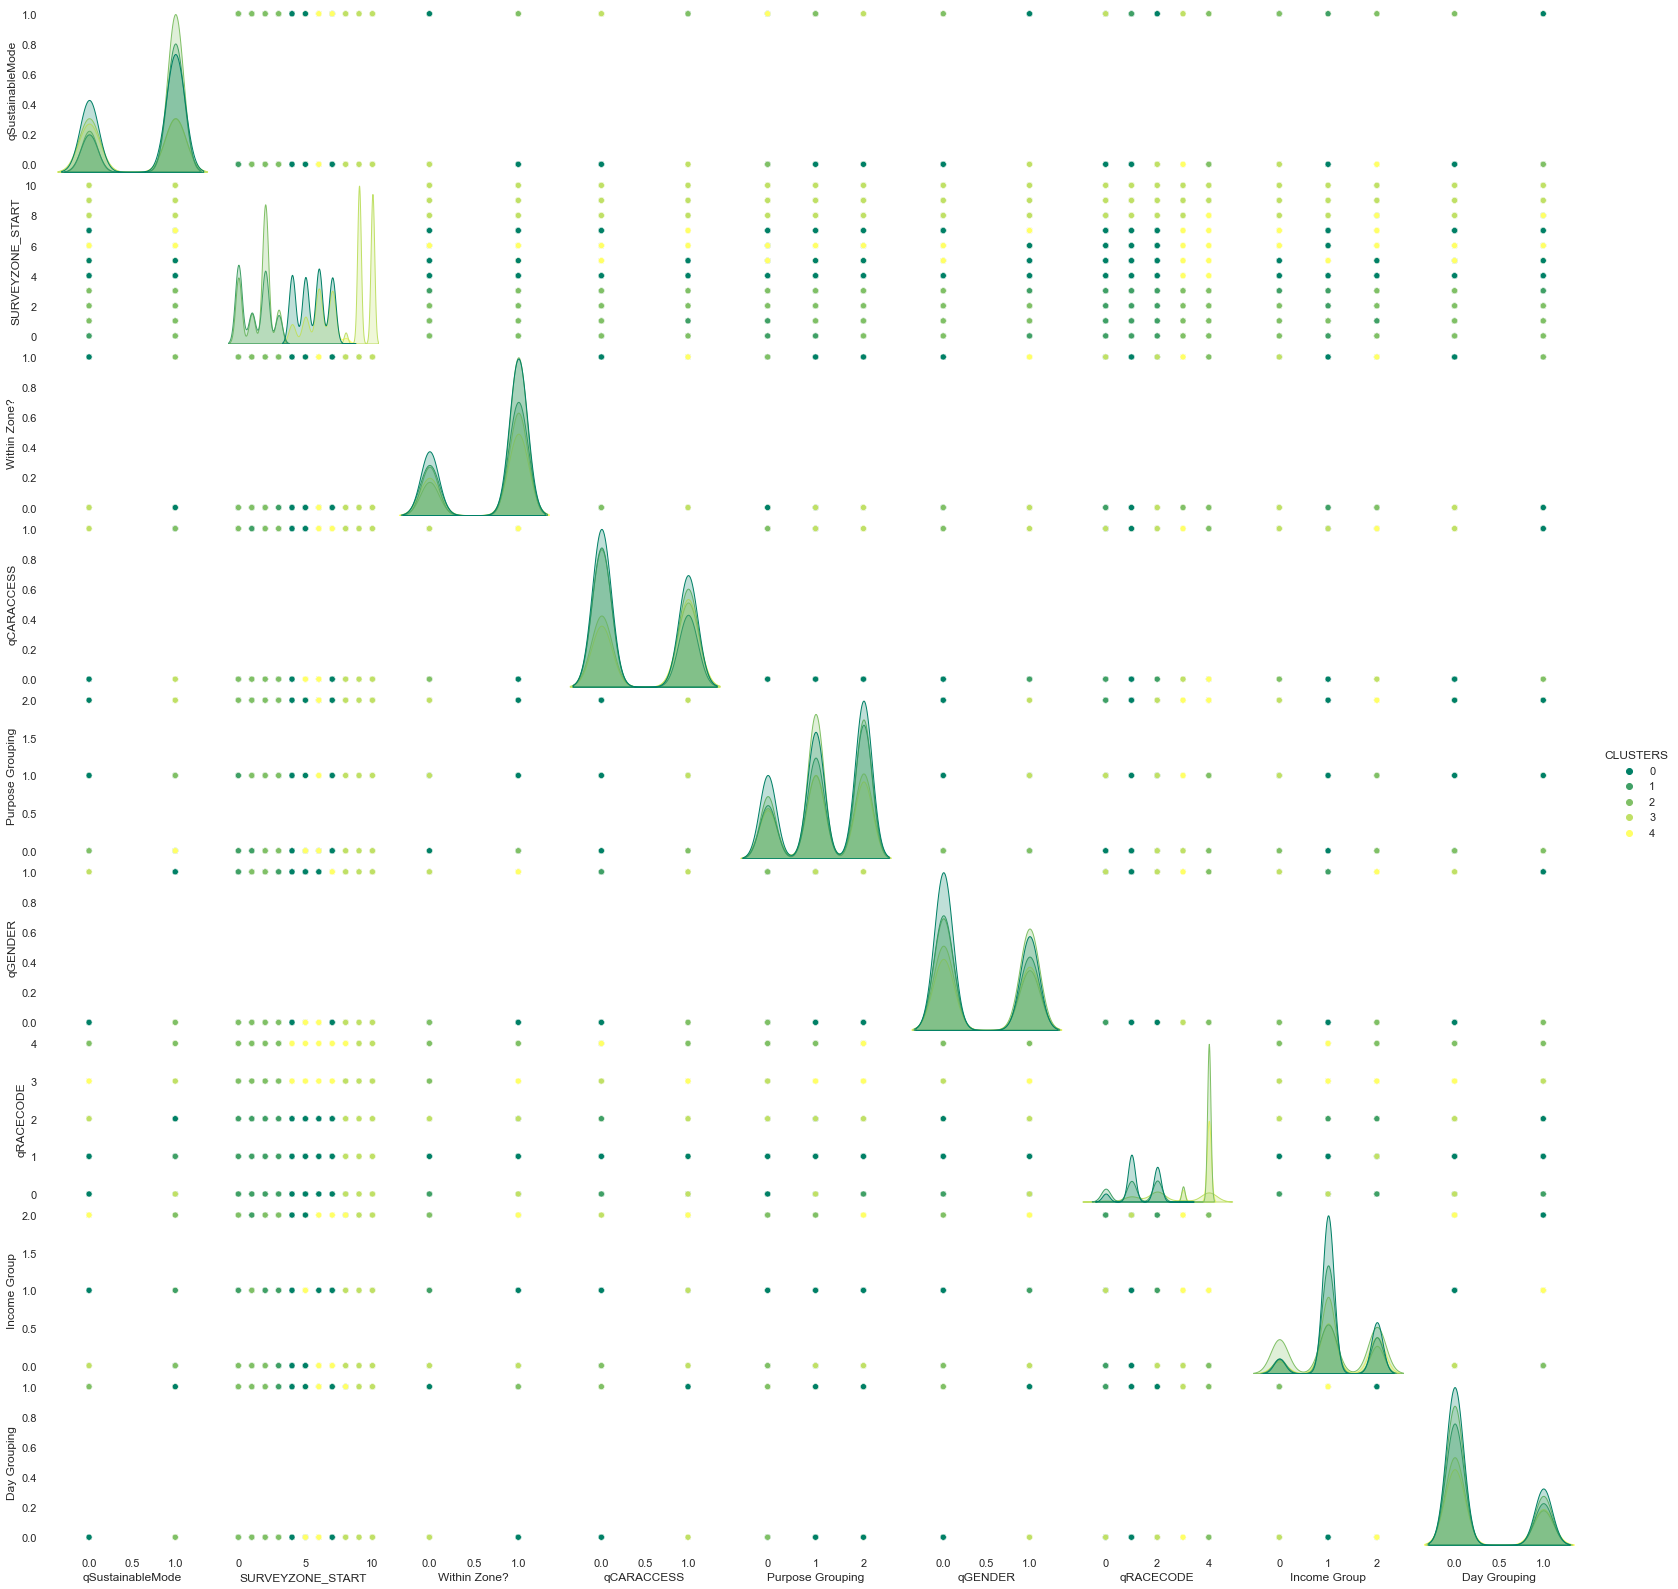

In [37]:
sns.pairplot(Trips_NYC_Analysis_byTrips[['qSustainableMode','SURVEYZONE_START','Within Zone?','qCARACCESS','Purpose Grouping','qGENDER', 'qRACECODE', 'Income Group',  'Day Grouping','CLUSTERS']], hue ='CLUSTERS', palette = "summer")

In [38]:
Trips_NYC_Analysis_byTrips.to_csv('Trips_NYC_Analysis_byTrips.csv')